# Equations to Calculate Change


## 1. Exponential Mortality Rate (Esquivel et al. Method):

$$
\text { Mortality Rate }=\left(1-\left(\frac{n_{\text {sur }}}{n_{\text {ini }}}\right)^{\text {1/T }}\right) \times 100
$$

- 'n_ini' is the initial number of living trees.
- 'n_sur' is the number of trees that survived at the end of the timespan.
- 'timespan' is the number of years over which the observation is made.
- This formula assumes a constant rate of mortality over the timespan and is exponential in nature.

## 2. Logarithmic Mortality Rate (Hoshino et al. Method):

Mortality Rate $=\log \left(\frac{n_{\text {ini }}}{n_{\text {sur }}}\right) \times$ 1/T $\times 100$

- This method also uses the initial ('n_ini ') and surviving ('n_sur ') tree counts.
- The logarithm of the ratio of initial to surviving trees is calculated.
- This approach can handle cases where mortality rate changes over time and provides a rate based on the natural logarithm.

## 3. Linear Mortality Rate

$$
\text{Mortality Rate} = (n_{initial} - n_{survivors}) / n_{initial} * 1/T * 100
$$

Differences:

- Behavior Over Time: The exponential method assumes a constant rate of mortality, which may not accurately reflect changes over time. The logarithmic method, however, can better represent varying rates of mortality over the observation period.
- Sensitivity to Large Changes: The logarithmic method can be more sensitive to large changes in tree counts, as the log function magnifies differences when the ratio of 'n_ini' to 'n_sur' is large.

Visualization:
To visualize these differences, we can plot the mortality rates calculated by each This will illustrate how the mortality rate changes as the number of surviving trees varies. Let's create a plot for this comparison.


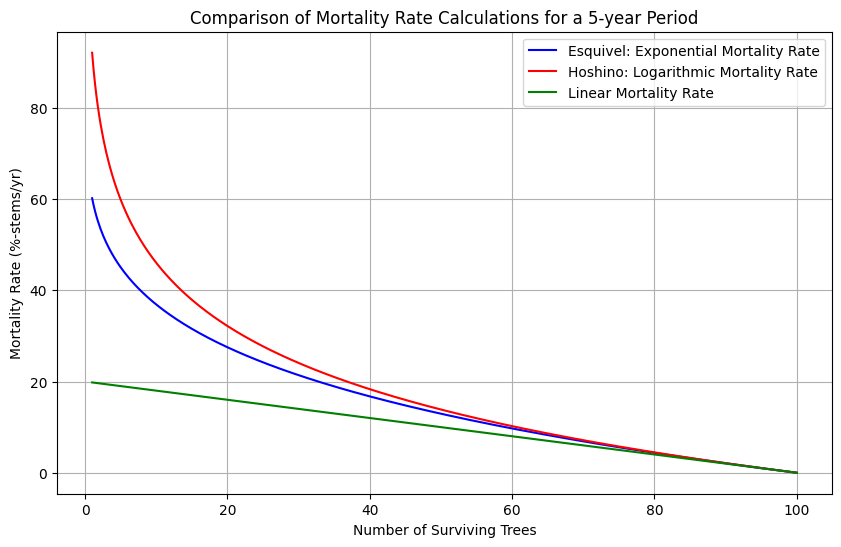

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
n_ini = 100  # Initial number of trees
timespan = 1 / 5  # Observation period in years

# Range of surviving trees
n_sur_range = np.linspace(1, n_ini, 500)  # From 1 surviving tree to all surviving

# Calculating mortality rates using both methods
mortality_rate_exp = (1 - (n_sur_range / n_ini) ** timespan) * 100  # Exponential method
mortality_rate_log = np.log(n_ini / n_sur_range) * timespan * 100  # Logarithmic method
mortality_rate_lin = (n_ini - n_sur_range) / (n_ini) * timespan * 100  # Linear method


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    n_sur_range,
    mortality_rate_exp,
    label="Esquivel: Exponential Mortality Rate",
    color="blue",
)
plt.plot(
    n_sur_range,
    mortality_rate_log,
    label="Hoshino: Logarithmic Mortality Rate",
    color="red",
)
plt.plot(
    n_sur_range,
    mortality_rate_lin,
    label="Linear Mortality Rate",
    color="green",
)
plt.xlabel("Number of Surviving Trees")
plt.ylabel("Mortality Rate (%-stems/yr)")
plt.title("Comparison of Mortality Rate Calculations for a 5-year Period")
plt.legend()
plt.grid(True)
plt.show()

**Relevant Takeaway:**

- The linear model is additive and linear whereas the others are not!

**Interpretation from ChatGPT**

The discrepancy you're observing between the linear model and the other two (exponential and logarithmic) models is due to the fundamental differences in how these models conceptualize mortality.

For the linear model, mortality is calculated as a simple proportion of the loss relative to the initial number of trees, evenly distributed over time. This model doesn't take into account the compound nature of tree mortality over time.

The exponential model assumes a constant percentage of trees die each year, which compounds over the timespan. The logarithmic model, derived from the exponential model, is an application of the logarithm to the ratio of surviving to initial trees, which translates a compound process into an additive one, providing an average annual rate when trees are dying at a non-constant rate.

When all trees die within the observation period (100 initial and 0 surviving), the linear model gives a straight value of -20% per year. However, the exponential and logarithmic models will approach infinity as the number of surviving trees approaches zero because they are trying to express a situation where the mortality rate is so high that it results in the complete loss of the population within the given timespan.

To illustrate with numbers:

- For the linear model, the loss of all trees over five years equates to a 20% annual loss, which is linear and additive.
- For the exponential model, since all trees are lost, it's trying to express a situation where each year a certain percentage of trees dies, but because none are left, this would suggest an infinitely high annual mortality rate.
- For the logarithmic model, it's attempting to calculate the average percentage change per year that would result in no trees surviving. As with the exponential model, when `n_sur` becomes 0, the logarithm of 0 is undefined (it approaches negative infinity), leading to an infinitely large mortality rate.

In practical terms, the exponential and logarithmic models are not suitable for situations where all trees die within the observation period, as they cannot handle a 100% mortality rate without going to infinity. The linear model does not have this limitation because it doesn't assume compounding or any form of change other than a direct subtraction of deaths from the initial count, spread evenly over the years.
